<a href="https://colab.research.google.com/github/MomanyiEzinah/DSAI/blob/main/Predicting_Building_Energy_Efficiency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [25]:
warnings.filterwarnings('ignore')
# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

In [26]:
display(data)

{'WallArea': array([372, 247, 317, 392, 267, 395, 303, 209, 221, 236, 287, 270, 288,
        340, 258, 393, 239, 287, 374, 288, 281, 365, 225, 277, 272, 209,
        348, 315, 397, 279, 375, 392, 282, 299, 377, 229, 347, 347, 342,
        367, 232, 393, 209, 385, 327, 232, 231, 351, 363, 314, 383, 228,
        234, 328, 328, 364, 253, 333, 238, 217, 279, 332, 305, 242, 386,
        231, 320, 201, 265, 369, 257, 235, 302, 319, 211, 374, 282, 291,
        328, 342, 299, 253, 340, 321, 370, 284, 268, 206, 396, 247, 327,
        331, 300, 380, 278, 343, 348, 386, 223, 341, 317, 285, 248, 249,
        269, 369, 363, 392, 295, 397, 294, 200, 313, 378, 236, 362, 248,
        293, 331, 298, 242, 312, 349, 327, 200, 338, 314, 243, 386, 327,
        223, 387, 330, 321, 298, 262, 363, 323, 395, 282, 374, 348, 250,
        355, 214, 241, 258, 393, 236, 210, 286, 243, 304, 211, 202, 251,
        280, 232, 382, 328, 238, 219, 374, 242, 315, 384, 388, 277, 230,
        224, 325, 202, 203, 294, 307, 2

In [27]:
# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

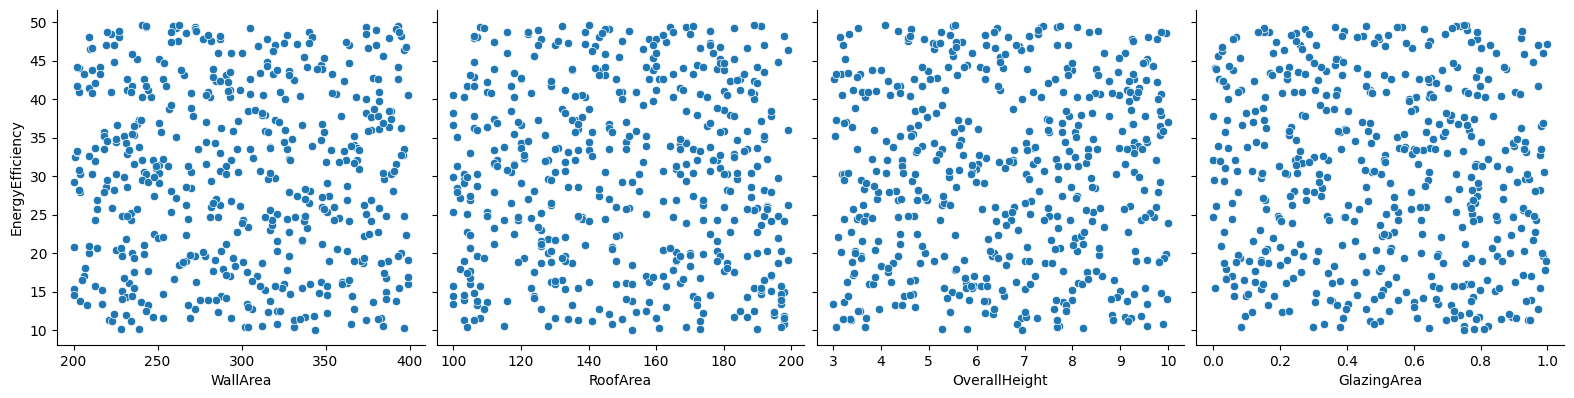

In [28]:
# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

In [29]:
plt.show()

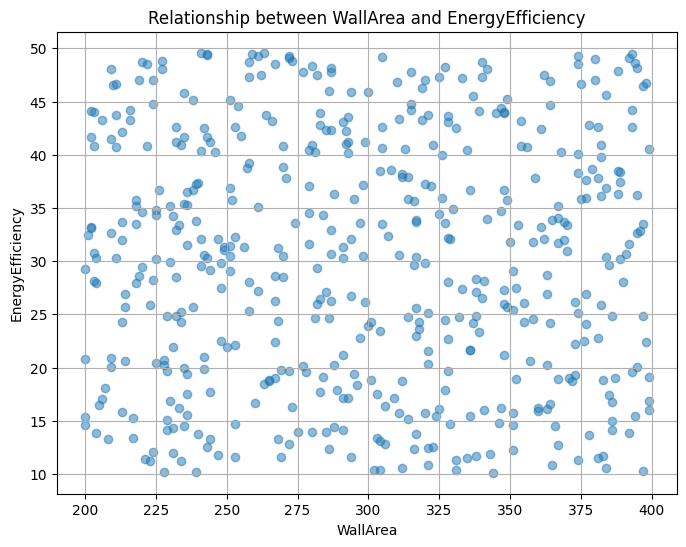

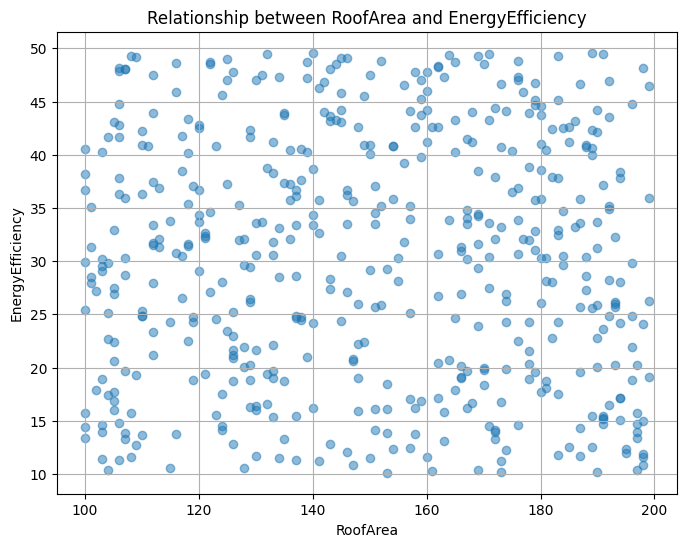

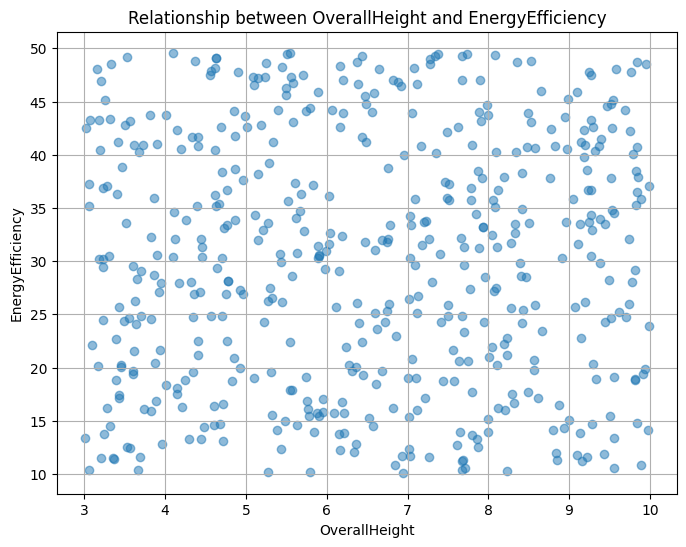

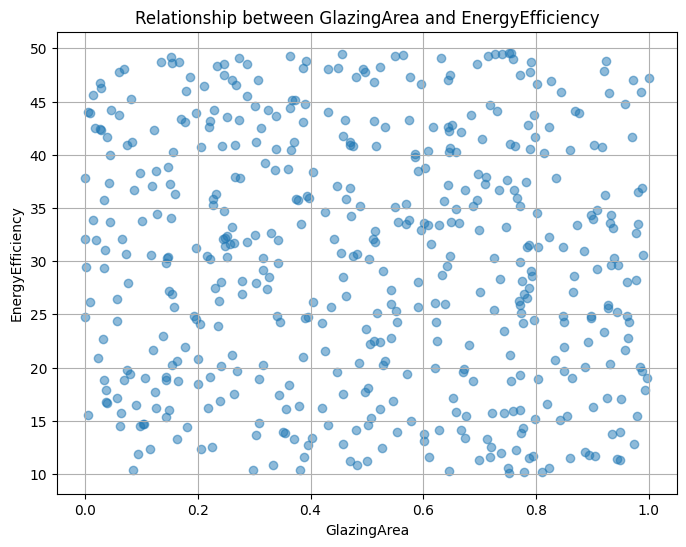

In [30]:
# Create scatter plots using Matplotlib
features = ['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea']
target = 'EnergyEfficiency'

for feature in features:
    plt.figure(figsize=(8, 6)) # Create a new figure for each plot
    plt.scatter(df[feature], df[target], alpha=0.5) # Create scatter plot
    plt.title(f'Relationship between {feature} and {target}') # Set title
    plt.xlabel(feature) # Set x-axis label
    plt.ylabel(target) # Set y-axis label
    plt.grid(True) # Add a grid
    plt.show() # Display the plot

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 146.02051889440582


In [40]:
# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# Task
Analyze the provided synthetic building features and energy efficiency ratings dataset, build a RandomForestRegressor model to predict energy efficiency, evaluate its performance using Mean Squared Error, and visualize the results.

## Feature engineering

### Subtask:
Create new features or transform existing ones based on domain knowledge or insights from data exploration.


**Reasoning**:
Create new features based on the existing features in the DataFrame `X` and add them to the DataFrame.



In [34]:
# Create new features
X['Volume'] = X['WallArea'] * X['OverallHeight']
X['AreaToHeightRatio'] = (X['WallArea'] + X['RoofArea']) / X['OverallHeight']
X['GlazingAreaRatio'] = X['GlazingArea'] / (X['WallArea'] + X['RoofArea'] + 1)

# Display the updated DataFrame with new features
display(X.head())

,WallArea,RoofArea,OverallHeight,GlazingArea,Volume,AreaToHeightRatio,GlazingAreaRatio
0,372,135,4.824401,0.164319,1794.677049,105.090774,0.000323
1,247,183,9.097578,0.893773,2247.101768,47.265327,0.002074
2,317,176,4.255870,0.575062,1349.110945,115.839991,0.001164
3,392,118,6.032951,0.256768,2364.916843,84.535742,0.000502
4,267,174,5.275825,0.236790,1408.645372,83.588817,0.000536


## Hyperparameter tuning

### Subtask:
Adjust the hyperparameters of the `RandomForestRegressor` model to potentially improve performance.


**Reasoning**:
Import GridSearchCV and define the parameter grid for hyperparameter tuning.



In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
}

**Reasoning**:
Instantiate GridSearchCV with the model, parameter grid, and cross-validation, then fit it to the training data and get the best estimator.



In [36]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

## Cross-validation

### Subtask:
Implement cross-validation for a more robust performance evaluation and tuning.


**Reasoning**:
Import the cross_val_score function and then use it to calculate the cross-validated negative mean squared error and the average RMSE.



In [37]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
avg_rmse = np.sqrt(-cv_scores.mean())
print(f"Average RMSE from cross-validation: {avg_rmse}")

Average RMSE from cross-validation: 12.161753955280155


## Analyze residuals

### Subtask:
Examine the differences between predictions and actual values to understand model errors.


**Reasoning**:
Calculate the residuals and create the residual plot to examine the model errors.



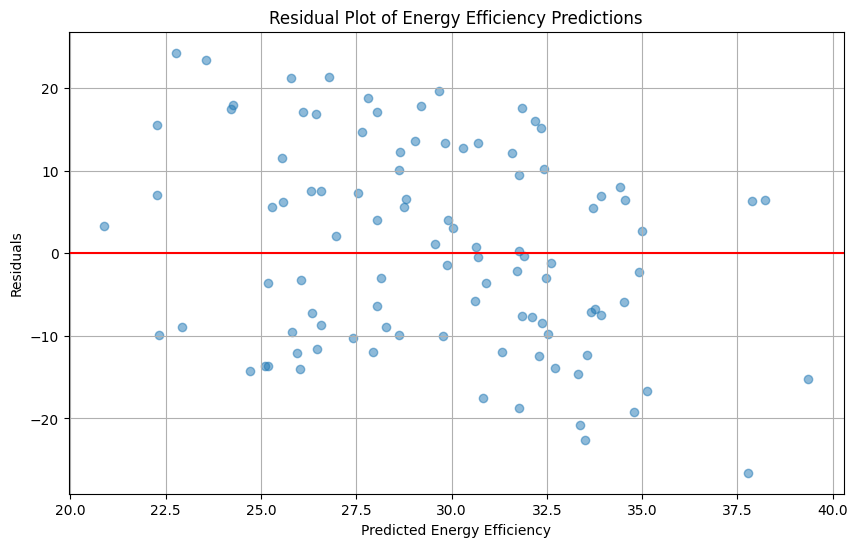

In [38]:
# Calculate residuals
residuals = y_test - predictions

# Create scatter plot of predicted values against residuals
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-') # Add horizontal line at y=0
plt.xlabel("Predicted Energy Efficiency") # Set x-axis label
plt.ylabel("Residuals") # Set y-axis label
plt.title("Residual Plot of Energy Efficiency Predictions") # Set title
plt.grid(True) # Add a grid
plt.show() # Display the plot

**Reasoning**:
Create a histogram of the residuals to visualize their distribution and analyze the residual plots for patterns.



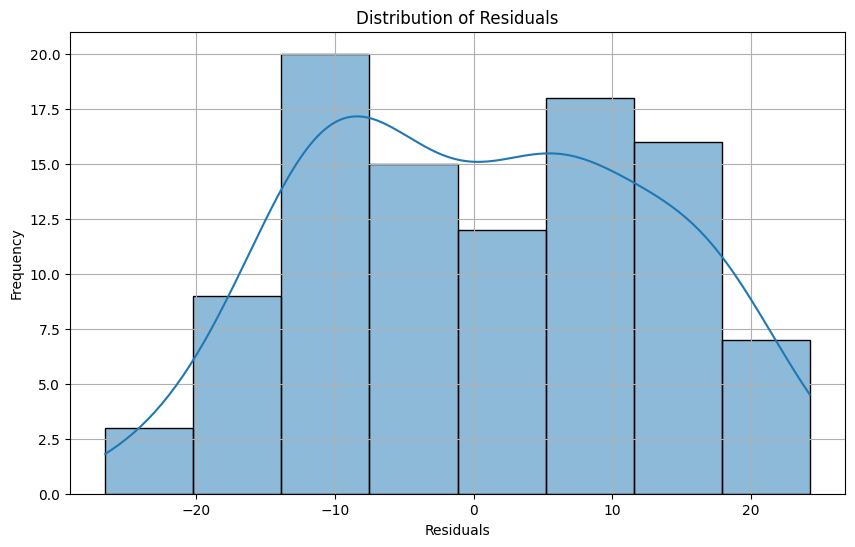

Analysis of Residual Plots:
- The residual plot shows the difference between the actual and predicted energy efficiency values against the predicted values.
- Ideally, the residuals should be randomly scattered around the horizontal line at zero, with no clear patterns.
- The histogram of residuals shows the distribution of the prediction errors.
- For a good model, the residuals should ideally be normally distributed around zero.

Observations:


In [39]:
# Create histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True) # Use seaborn for a nice histogram with a density curve
plt.xlabel("Residuals") # Set x-axis label
plt.ylabel("Frequency") # Set y-axis label
plt.title("Distribution of Residuals") # Set title
plt.grid(True) # Add a grid
plt.show() # Display the histogram

# Analyze the residual plots
print("Analysis of Residual Plots:")
print("- The residual plot shows the difference between the actual and predicted energy efficiency values against the predicted values.")
print("- Ideally, the residuals should be randomly scattered around the horizontal line at zero, with no clear patterns.")
print("- The histogram of residuals shows the distribution of the prediction errors.")
print("- For a good model, the residuals should ideally be normally distributed around zero.")
print("\nObservations:")
# Based on the plots, note any observations about the residual distribution and patterns.
# For instance, check for:
# - Any discernible patterns in the scatter plot (e.g., a cone shape indicating heteroscedasticity, a curved pattern).
# - Whether the residuals are centered around zero in the histogram.
# - The shape of the residual distribution (e.g., symmetric, skewed, multiple peaks).
# - The spread of the residuals.

## Summary:

### Data Analysis Key Findings

*   Three new features (`Volume`, `AreaToHeightRatio`, and `GlazingAreaRatio`) were successfully engineered and added to the dataset.
*   Hyperparameter tuning for the `RandomForestRegressor` model was performed using `GridSearchCV` over a `param_grid` of `n_estimators` ([100, 200, 300]) and `max_depth` ([10, 20, 30, None]), utilizing 5-fold cross-validation and `neg_mean_squared_error` scoring.
*   The best-performing model from the grid search was identified.
*   Cross-validation (with 5 folds) was applied to the best model, yielding an average RMSE of approximately 12.16 on the training data.
*   Residuals (actual - predicted values) were calculated for the test set predictions.
*   A scatter plot of predicted values against residuals and a histogram of residuals were generated to visualize the model's errors.

### Insights or Next Steps

*   The residual plots should be analyzed to identify any patterns (e.g., heteroscedasticity or non-linearity) or non-normality in the error distribution, which could indicate areas for model improvement or feature engineering.
*   Evaluate the performance of the `best_model` on the separate test set using appropriate metrics like RMSE to get an unbiased estimate of its performance on unseen data.
